In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [24]:
data = pd.read_csv("iris-dataset.csv")
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


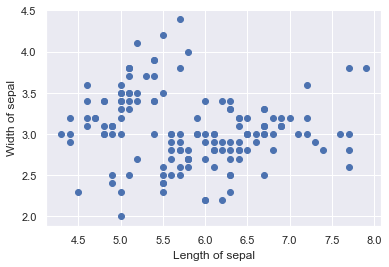

In [25]:
plt.scatter(data["sepal_length"],data["sepal_width"])
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.show()

In [26]:
x = data.copy()
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
kmeans = KMeans(3)
kmeans.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
clusters = kmeans.fit_predict(x)
clustered_Data = data.copy()
clustered_Data["clusters"] = clusters
clustered_Data.head()

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


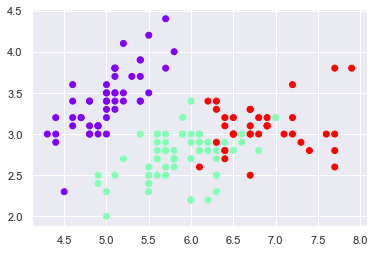

In [29]:
plt.scatter(data["sepal_length"],data["sepal_width"],c=clustered_Data["clusters"],cmap="rainbow")


In [30]:
x_scaled = preprocessing.scale(data)


In [31]:
scaled_kmeans = KMeans(3)
scaled_kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
scaled_clusters = data.copy()
scaled_clusters['clusters'] = kmeans.fit_predict(x_scaled)
scaled_clusters.head()


,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


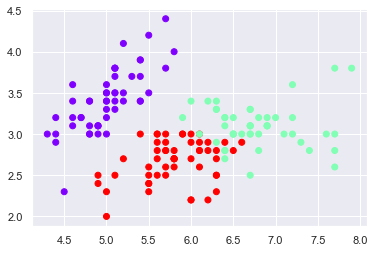

In [33]:
plt.scatter(data["sepal_length"],data["sepal_width"],c=scaled_clusters["clusters"],cmap="rainbow")


In [34]:
wcss = []
cl_num = 10
for i in range(1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss


[600.0,
 223.73200573676345,
 140.96581663074699,
 114.39210582733432,
 91.08507916275063,
 80.24972235577131,
 71.94273046782052,
 63.154892549067995,
 54.222849641819735]

Text(0, 0.5, 'Within-cluster Sum of Squares')

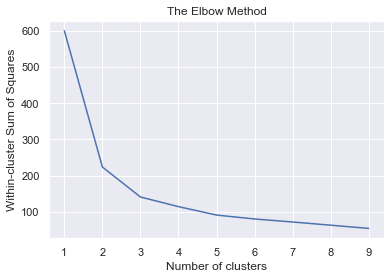

In [35]:
num_cluster = range(1,cl_num)
plt.plot(num_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [36]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)
clustered_Data5 = data.copy()
clustered_Data5["clusters"] = kmeans_5.fit_predict(x_scaled)

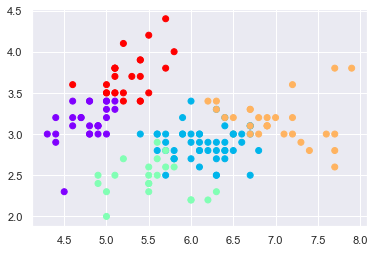

In [37]:
plt.scatter(data["sepal_length"],data["sepal_width"],c=clustered_Data5["clusters"],cmap="rainbow")

In [38]:
real_data = pd.read_csv('iris-with-answers.csv')
real_data['species'].unique()
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})


In [39]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


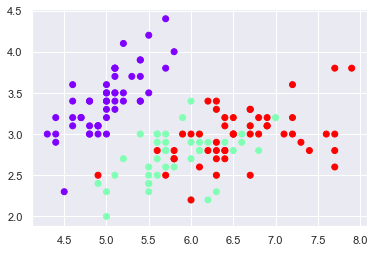

In [41]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')


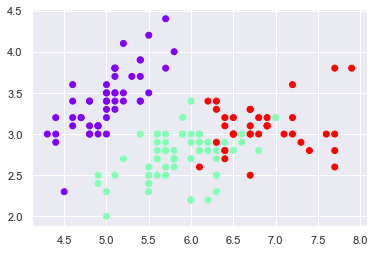

In [42]:
plt.scatter(data["sepal_length"],data["sepal_width"],c=clustered_Data["clusters"],cmap="rainbow")

